In [8]:
import dask.dataframe as dd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from dask_ml.model_selection import train_test_split
from dask_ml.ensemble import BlockwiseVotingRegressor
from sklearn.linear_model import LinearRegression


In [9]:
# Import dataset
df = dd.read_csv('advertising.csv')


In [10]:
# Show head
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
# Describe
df.describe().compute()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# Shape
df.shape

(Delayed('int-a87f4f1d-19b1-4b63-a4bb-00bc0b51380b'), 4)

In [13]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_cols = len(df.columns)

# Print the shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: Dask Series Structure:
npartitions=1
Newspaper    int64
TV             ...
dtype: int64
Dask Name: dataframe-count-agg, 3 graph layers
Number of columns: 4


In [14]:
# Convert Dask Dataframe to Pandas Dataframe
df_pandas = df.compute()


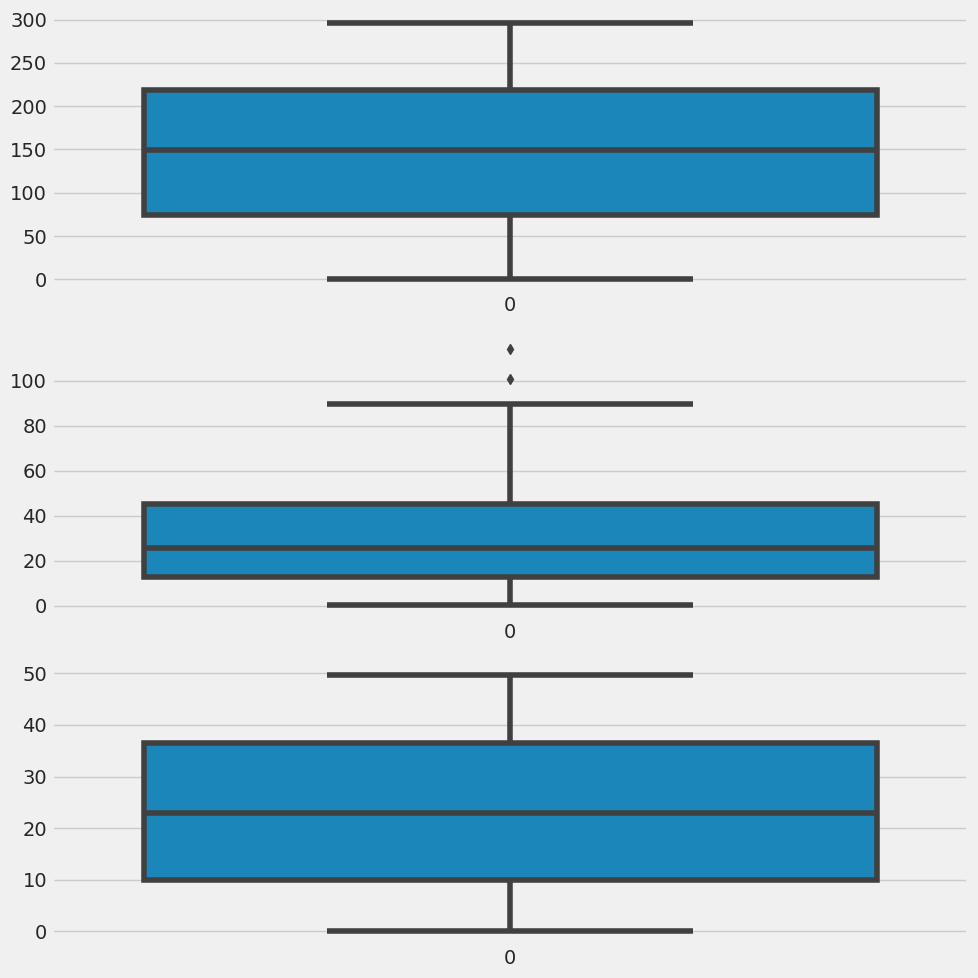

In [15]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.boxplot(df_pandas['TV'], ax = axs[0])
plt2 = sns.boxplot(df_pandas['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df_pandas['Radio'], ax = axs[2])
plt.tight_layout()

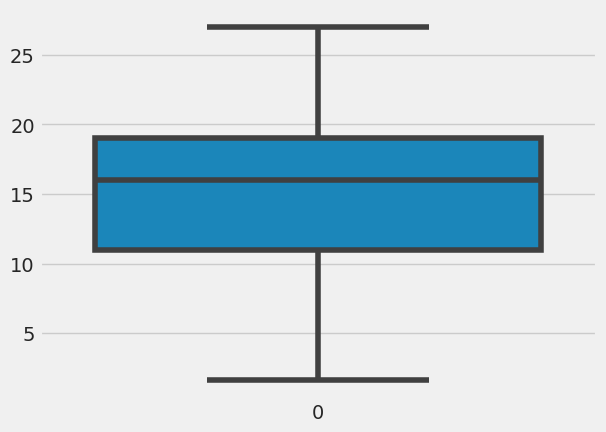

In [16]:
sns.boxplot(df_pandas['Sales'])
plt.show()

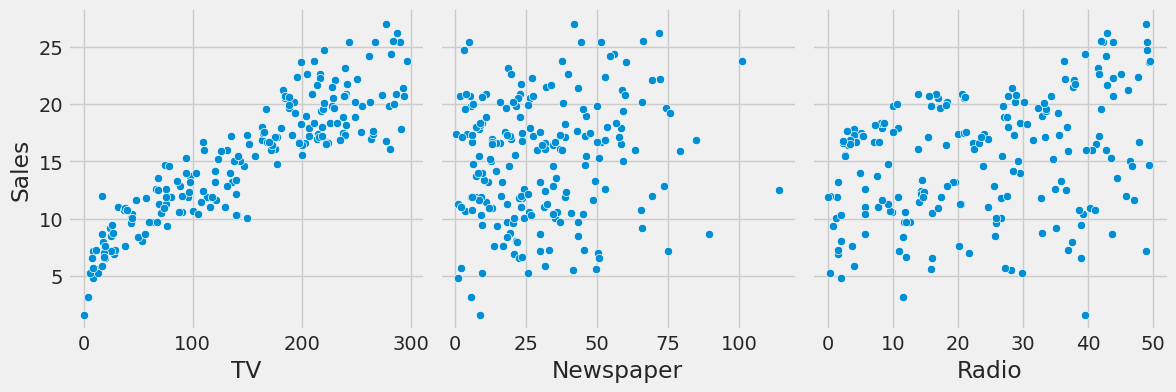

In [17]:
sns.pairplot(df_pandas, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

<Axes: >

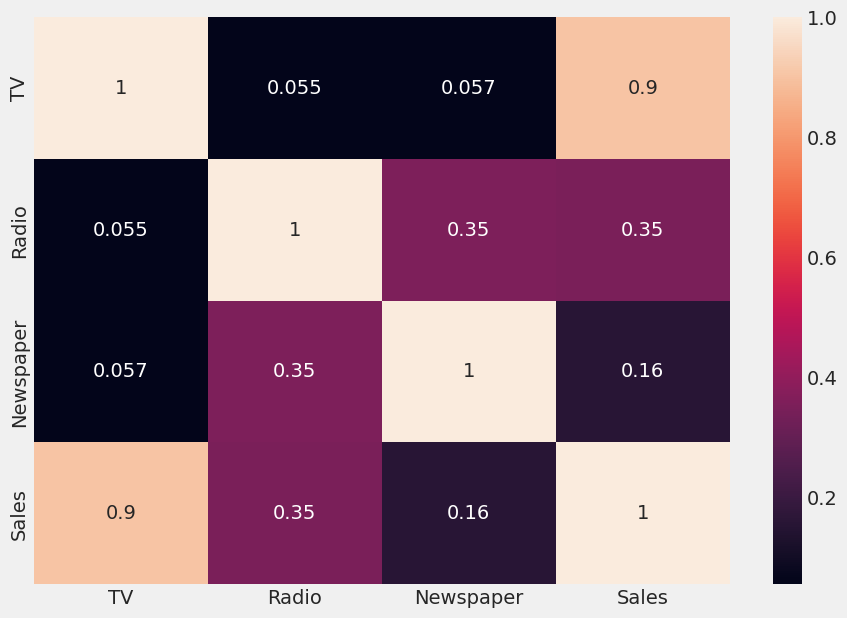

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pandas.corr(), annot = True)

In [21]:
# Split defendent and independent features
X = df.drop('Sales',axis=1)
y = df['Sales']

In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

/config/.local/lib/python3.8/site-packages/dask_ml/model_selection/_split.py:462: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [42]:
linear_model = LinearRegression()
linear_model.fit(X_train.compute(),y_train.compute())

LinearRegression()

In [46]:
y_preds = linear_model.predict(y_test.compute())
y_preds